# Data Visualization: Ford Go Bike 2018
## by Nada Mohamed

## content:
<ul>
<li><a href="#intro">Introduction.</a></li>
<li><a href="#pw">Preliminary Wrangling.</a></li>
<li><a href="#ue">Univariate Exploration.</a></li>
<li><a href="#be">Bivariate Exploration.</a></li>
<li><a href="#me">Multivariate Exploration.</a></li>
</ul>

<a id='intro'></a>
## Introduction:
Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. In June 2017 the system was `officially re-launched as Ford GoBike in a partnership with Ford Motor Company`. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.
- I will be working on the data of year (2018), which include information about (Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber / Customer) , Member Year of Birth, Member Gender, bike share for all trip subscription)

<a id='pw'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import zipfile
from io import BytesIO
import urllib.request as urllib2
import re
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
pd.set_option('float_format', '{:f}'.format)

In [2]:
# downloading the data sets of 2018.
urls = ['https://s3.amazonaws.com/fordgobike-data/201801-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201802-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201803-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201804-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201805-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201806-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201807-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201808-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201809-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201810-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201811-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201812-fordgobike-tripdata.csv.zip']
bike_dfs = []
for link in urls:
    url = link
    name = re.findall('data/(.+?).zip' , url, flags=re.IGNORECASE)
    r = urllib2.urlopen(url).read()
    file = zipfile.ZipFile(BytesIO(r))
    file_csv = file.open(name[0])
    file_df = pd.read_csv(file_csv)
    bike_dfs.append(file_df)
# appending & create dataframe representing the whole year (2018).
BikeData = pd.concat(bike_dfs)

In [3]:
BikeData.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.000000,Mission Dolores Park,37.761420,-122.426435,285.000000,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.000000,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.000000,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.000000,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.000000,Jackson St at 5th St,37.348759,-121.894798,296.000000,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.000000,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.000000,Market St at Franklin St,37.773793,-122.421239,47.000000,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.000000,Laguna St at Hayes St,37.776435,-122.426244,19.000000,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.000000,Male,No


In [4]:
BikeData.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
131358,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.000000,Hubbell St at 16th St,37.766474,-122.398295,81.000000,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.000000,Female,No
131359,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.000000,Washington St at Kearny St,37.795393,-122.404770,58.000000,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.000000,Female,No
131360,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.000000,Downtown Berkeley BART,37.870139,-122.268422,255.000000,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.000000,Male,No
131361,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.000000,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.000000,Esprit Park,37.761634,-122.390648,545,Subscriber,1963.000000,Male,No
131362,150,2018-12-01 00:03:05.7420,2018-12-01 00:05:36.0260,107.000000,17th St at Dolores St,37.763015,-122.426497,119.000000,18th St at Noe St,37.761047,-122.432642,4319,Subscriber,NaN,NaN,No


In [5]:
BikeData.info(show_counts = True)
BikeData.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1863721 non-null  int64  
 1   start_time               1863721 non-null  object 
 2   end_time                 1863721 non-null  object 
 3   start_station_id         1851950 non-null  float64
 4   start_station_name       1851950 non-null  object 
 5   start_station_latitude   1863721 non-null  float64
 6   start_station_longitude  1863721 non-null  float64
 7   end_station_id           1851950 non-null  float64
 8   end_station_name         1851950 non-null  object 
 9   end_station_latitude     1863721 non-null  float64
 10  end_station_longitude    1863721 non-null  float64
 11  bike_id                  1863721 non-null  int64  
 12  user_type                1863721 non-null  object 
 13  member_birth_year        1753003 non-null  

(1863721, 16)

In [6]:
BikeData.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [7]:
BikeData.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1863721.000000,1851950.000000,1863721.000000,1863721.000000,1851950.000000,1863721.000000,1863721.000000,1863721.000000,1753003.000000
mean,857.302571,119.674436,37.766780,-122.349184,118.172976,37.766900,-122.348661,2296.850541,1983.087962
std,2370.378862,100.397559,0.105769,0.165463,100.440254,0.105648,0.165060,1287.732521,10.442886
min,61.000000,3.000000,37.263310,-122.473658,3.000000,37.263310,-122.473658,11.000000,1881.000000
25%,350.000000,33.000000,37.771058,-122.411403,30.000000,37.771058,-122.409449,1225.000000,1978.000000
50%,556.000000,89.000000,37.781074,-122.397380,88.000000,37.781270,-122.397086,2338.000000,1985.000000
75%,872.000000,186.000000,37.796248,-122.286533,183.000000,37.797280,-122.289370,3333.000000,1991.000000
max,86366.000000,381.000000,45.510000,-73.570000,381.000000,45.510000,-73.570000,6234.000000,2000.000000


### What is the structure of your dataset?

> - The data consist of 1863721 row and 16 columns which store the data of duration in sec, start time and end time for each trip. It also contain the start stations and end sattions names and ids in addition to their locations (latitude,longitude). it also has the bikes ids, users gender (male, female, other), users type (subscriber, customer), users birth year, and lastly, bikeshare for all trip subscribtion.
> - there are some missing values in some columns like in start and end stations names and ids (11771 misssing data), It wont ba a bother as they are not that much and wont affect my analysis. In addition, birth year and gender columns also contain missing values (110718 and 110367 respectively) which may need to be delt with.
> - some columns have the wrong dtype, which will also need to be adjusted before we start.
### What is/are the main feature(s) of interest in your dataset?

> - I'm intrested in the pattern of each user type and gender, also the count of trips for every day of the week and also for each month of the year, the duration of trips for each user type, which hour of the day got the most trips, and which start and end station is the most common.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - I see that members gender and members type columns would be useful when it comes to studying the users characteristics, and from the birth year column I could extract every user's age, also from the start time column I could extract the hour, day, and month for each trip to further aid my analysis.

# cleaning the data before starting

In [8]:
# create a copy to clean 
BikeCopy = BikeData.copy()

In [9]:
# adjusting dtypes. 
BikeCopy[['start_time', 'end_time']] = BikeCopy[['start_time', 'end_time']].astype('datetime64[ns]')
BikeCopy[['start_station_id', 'end_station_id', 'bike_id']] = BikeCopy[['start_station_id', 'end_station_id', 'bike_id']].astype('object')
BikeCopy['member_birth_year'] = BikeCopy['member_birth_year'].astype('Int64')

In [10]:
# creating new column represinting month.
BikeCopy['month'] = BikeCopy['start_time'].dt.strftime('%B')

In [11]:
# creating new column represinting the day of the week.
BikeCopy['day_of_week'] = BikeCopy['start_time'].dt.strftime('%A')

In [12]:
# creating new column represinting the day of the month.
BikeCopy['day_of_month'] = BikeCopy['start_time'].dt.day.astype(int)

In [13]:
# creating new column represinting the hours.
BikeCopy['hour'] = BikeCopy['start_time'].dt.hour

In [14]:
# creating new column represinting users age.
BikeCopy['user_age'] = 2018 - BikeCopy['member_birth_year']

In [15]:
# converting day_of_week and month columns into an ordered categorical types.
ordinal_var_dict = {'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        # Returns the types for each key in the dict with the categories and orderedness
        ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
        # Use pandas.astype() to convert the each key's column from a plain object type into an ordered categorical type 
        BikeCopy[var] = BikeCopy[var].astype(ordered_var)
    else: # pre-v0.21
        BikeCopy[var] = BikeCopy[var].astype('category', ordered = True, categories = ordinal_var_dict[var])

In [16]:
# display final strcture of the dataframe.
BikeCopy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day_of_week,day_of_month,hour,user_age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,1986,Male,No,January,Wednesday,31,22,32
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2815,Customer,<NA>,NaN,No,January,Wednesday,31,16,<NA>
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,3039,Customer,1996,Male,No,January,Wednesday,31,14,22
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,...,321,Customer,<NA>,NaN,No,January,Wednesday,31,14,<NA>
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,617,Subscriber,1991,Male,No,January,Wednesday,31,19,27


In [17]:
BikeCopy.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1851950 non-null  object        
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1851950 non-null  object        
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  object        
 12  u

<a id='ue'></a>
# First: Univariate Exploration

> In this section, I will investigate distributions of individual variables. 
such as :
- user type.
- user gender.
- bike share for all program enrollment.
- top statrt and end stations.
- total rides per hour / month / day (of week - of month) / trip duration.

# User type / gender

In [18]:
# setteing vars for colors to use later.
base = sb.color_palette()[0]
base2 = sb.color_palette()[2]
base3 = sb.color_palette()[3]

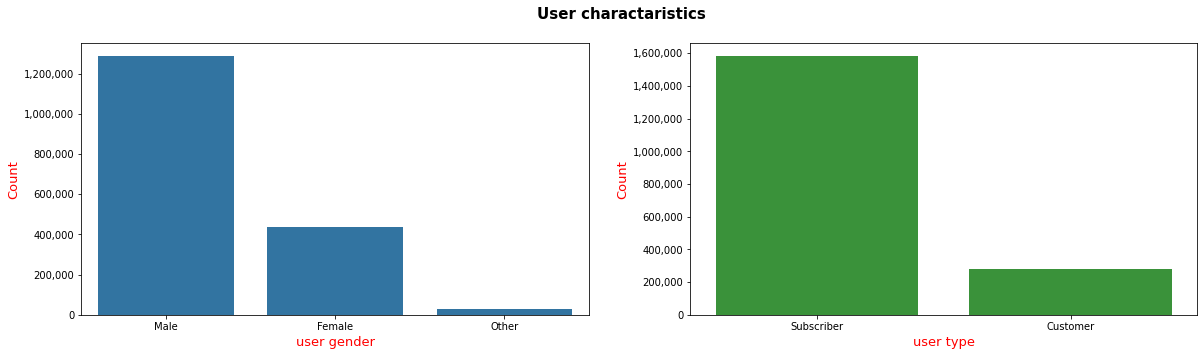

In [19]:
# setting figure size
plt.figure(figsize= [20, 5])
plt.suptitle('User charactaristics', fontsize = 15, fontweight='semibold');
# plotting user gender count.
plt.subplot(1,2,1)
ax = sb.countplot(data = BikeCopy, x = 'member_gender', color = base)
vals = ax.get_yticks()
ax.set_yticklabels(["{:,}".format(int(x)) for x in vals])
plt.xlabel('user gender', fontsize = 13, color = 'red')
plt.ylabel('Count', fontsize = 13, color = 'red');
# plotting user type count.
plt.subplot(1,2,2)
ax2 = sb.countplot(data = BikeCopy, x = 'user_type', color = base2)
vals2 = ax2.get_yticks()
ax2.set_yticklabels(["{:,}".format(int(x)) for x in vals2])
plt.xlabel('user type', fontsize = 13, color = 'red')
plt.ylabel('Count', fontsize = 13, color = 'red');

## findings:
- Looks like most users are males and also the most are actually subscribed to the program.


# Bike Share for All program enrollment.

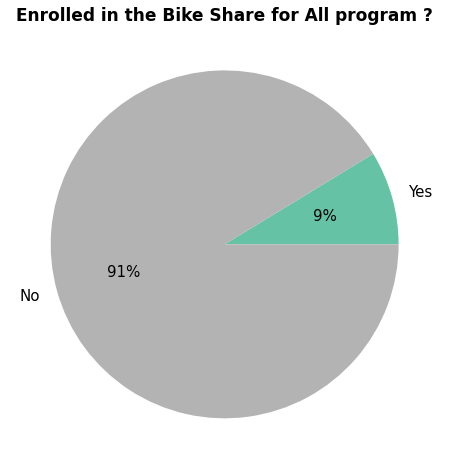

In [20]:
# tracks members who are enrolled in the Bike Share for All program.
plt.figure(figsize= [8, 8])
BikeCopy.bike_share_for_all_trip.value_counts().sort_values().plot(kind = 'pie', autopct='%1.0f%%', label="", fontsize = 15, cmap = 'Set2' )
plt.title('Enrolled in the Bike Share for All program ?', fontsize = 17, fontweight = 'semibold');

## findings:
- The majority of users are subscribed to the standard annual membership with about 91%, while 9% of users are actually subscribed to this for all program.

#### About (Bikeshare for All):
Bikeshare for All  is a subsidized membership program that makes membership accessible to low-come residents.The 5 dollars discounted Ford GoBike membership is available to recipients of eligible assistance programs, including PG&E California Alternate Rate for Energy (CARE), San Francisco Muni Lifeline and CalFresh/SNAP.
Members enrolled in Ford GoBike via the Bike Share for All discount program can take unlimited free 60-minute trips. By comparison, the standard annual Ford GoBike membership costs 149 dollars per year and gives riders access to unlimited 45-minute rides on any Ford GoBike.

# Top start and end stations.

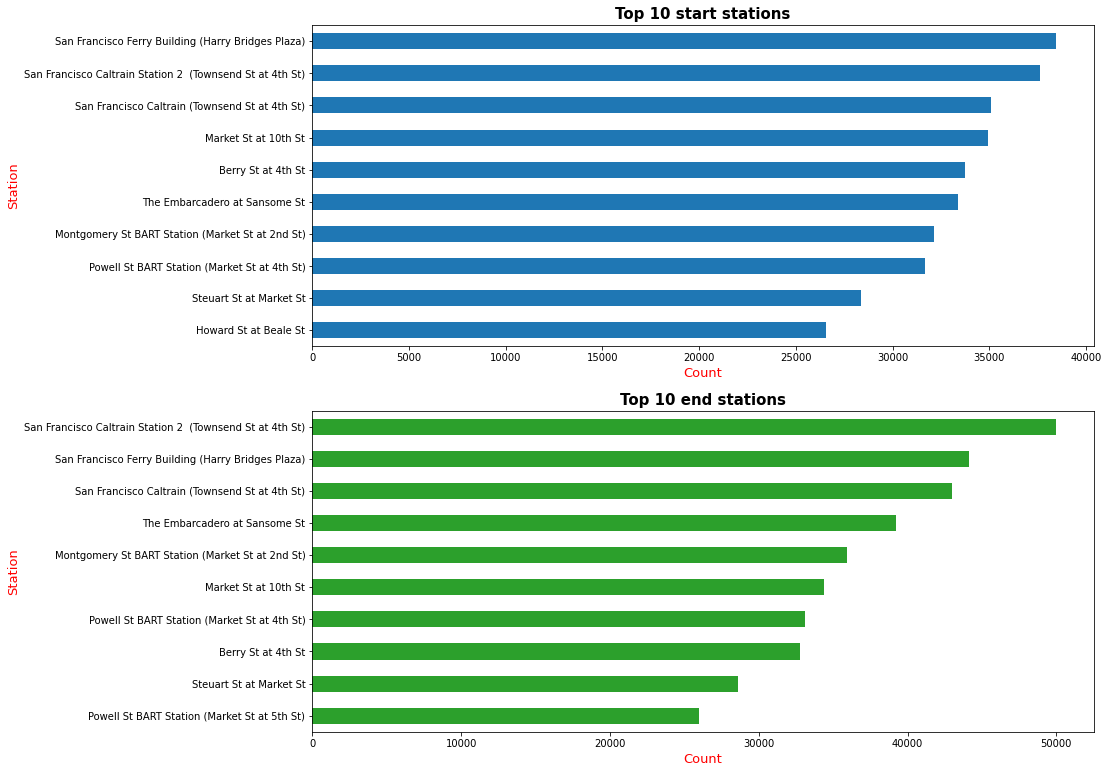

In [21]:
# setting figure size
plt.figure(figsize=[14,13])
# plotting top 10 start stations count
plt.subplot(2,1,1)
BikeCopy['start_station_name'].value_counts().nlargest(10).sort_values().plot(kind= 'barh')
plt.xlabel('Count', fontsize = 13, color = 'red')
plt.ylabel('Station', fontsize = 13, color = 'red')
plt.title('Top 10 start stations', fontsize = 15, fontweight = 'semibold');
# plotting top 10 end stattions count
plt.subplot(2,1,2)
BikeCopy['end_station_name'].value_counts().nlargest(10).sort_values().plot(kind= 'barh', color = base2)
plt.xlabel('Count', fontsize = 13, color = 'red')
plt.ylabel('Station', fontsize = 13, color = 'red')
plt.title('Top 10 end stations', fontsize = 15, fontweight = 'semibold');

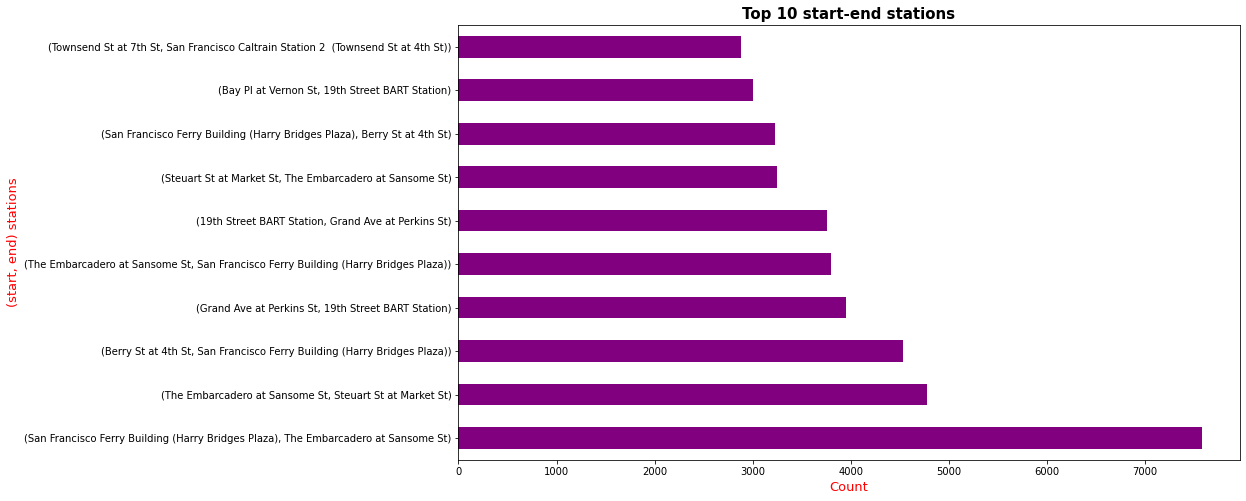

In [22]:
# setting figure size
plt.figure(figsize=[14,8])
# grouping by start then end station names, and plotting bar count for top 10 combination.
BikeCopy.groupby(['start_station_name'])['end_station_name'].value_counts().nlargest(10).plot(kind = 'barh', color = 'Purple')
plt.xlabel('Count', fontsize = 13, color = 'red')
plt.ylabel('(start, end) stations', fontsize = 13, color = 'red')
plt.title('Top 10 start-end stations', fontsize = 15, fontweight = 'semibold');

## findings:
- A lot of trips seem to be starting from `San Francisco Ferry Building (Harry Bridges Plaza)`.
- `San Francisco Caltrain Station 2  (Townsend St at 4th St)` is the most common end station.
- Looks like the trips that start from `San Francisco Ferry Building (Harry Bridges Plaza)` and end at `The Embarcadero at Sansome St` are very common as well.

# Total rides per hour

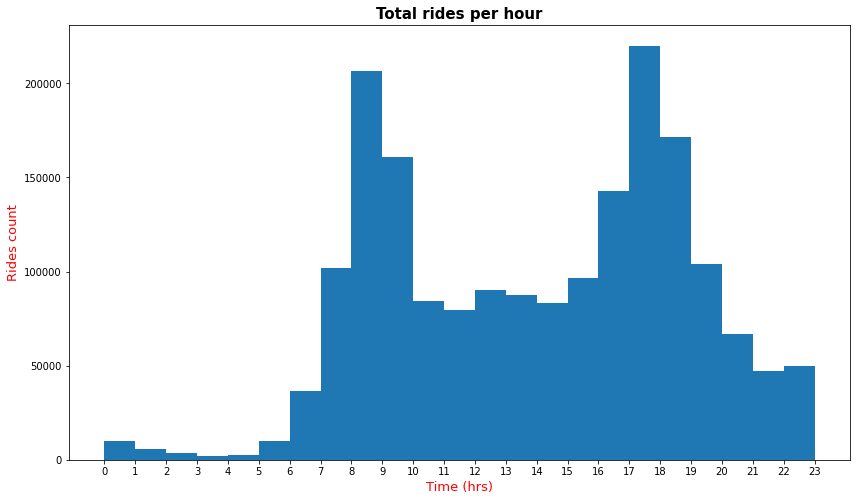

In [23]:
# setting bins, ticks, and lables for the x axis (time).
bins = np.arange(0, BikeCopy.hour.max()+ 1, 1)
ticks = range(0,24)
labels = ['{}'.format(v) for v in ticks]
# setting figure size and plotting ride count for each hour of the day.
plt.figure(figsize=[14,8])
plt.hist(data = BikeCopy, x = 'hour', bins = bins)
plt.xticks(ticks, labels)
plt.xlabel('Time (hrs)', fontsize = 13, color = 'red')
plt.ylabel('Rides count', fontsize = 13, color = 'red')
plt.title('Total rides per hour', fontsize = 15, fontweight = 'semibold');

## findings:
- Trip count peaks at `8 AM` in the morning and `17 = 5 PM` in the evening, which is pretty reasonable as they are considered rush hours.

# Total rides per month

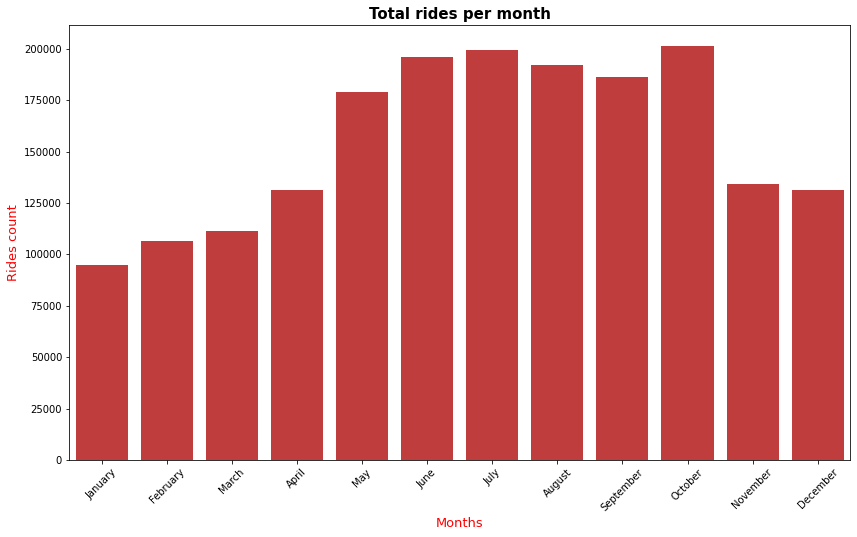

In [24]:
# setting figure size and plotting ride count for each month of the year.
plt.figure(figsize=[14,8])
sb.countplot(data = BikeCopy, x = 'month', color = base3)
plt.xticks(rotation = 45)
plt.xlabel('Months', fontsize = 13, color = 'red')
plt.ylabel('Rides count', fontsize = 13, color = 'red')
plt.title('Total rides per month', fontsize = 15, fontweight = 'semibold');

## findings:
- The number of trips increased as the months advanced, spiked from `April` to `May` and dipped in `August`, then incrased again in `October`.
- It seems like the trip count here varies accordng to the season, which decreases in winter months and increases as spring emerges from `April` and decreases a little in `August` where summer is at it peaks, then peaks again in `October's` autum.

# Total rides per weekday

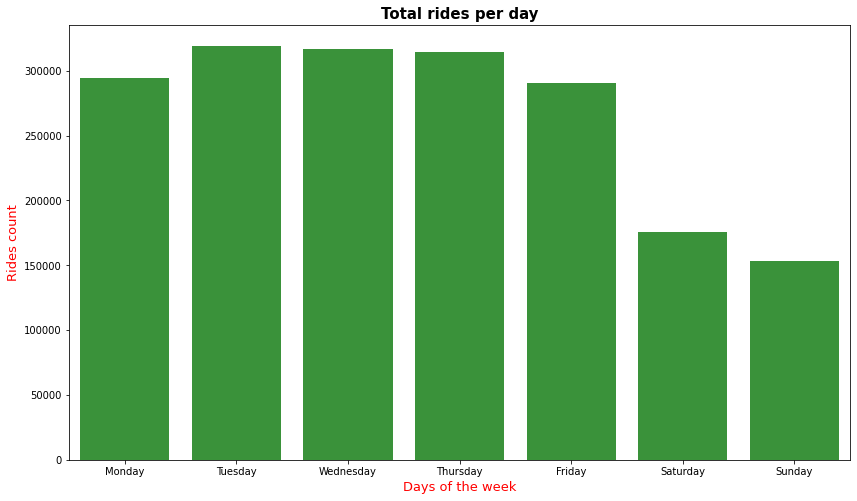

In [25]:
# setting figure size and plotting ride count for each day of the week.
plt.figure(figsize=[14,8])
sb.countplot(data = BikeCopy, x = 'day_of_week', color = base2)
plt.xlabel('Days of the week', fontsize = 13, color = 'red')
plt.ylabel('Rides count', fontsize = 13, color = 'red')
plt.title('Total rides per day', fontsize = 15, fontweight = 'semibold');

## findings:
- The count of trips over weekdays is greater than that of weekends(Sat & Sun).

# Total rides per monthday

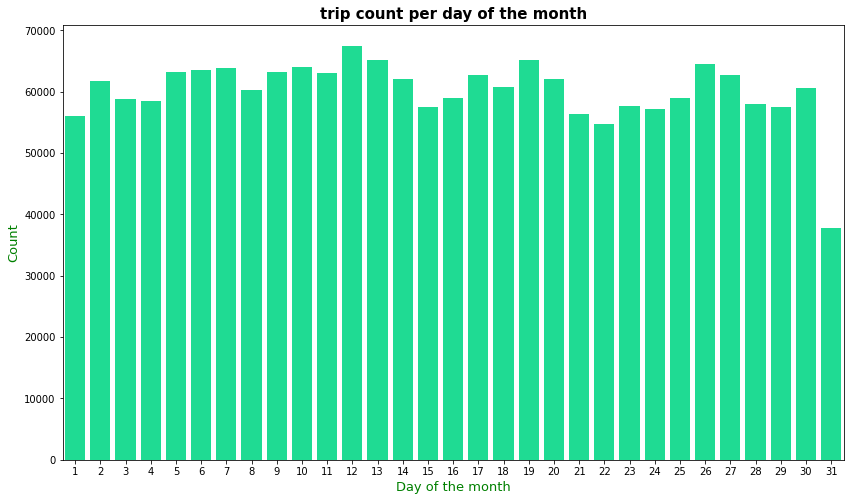

In [26]:
# setting figure size and plotting ride count for each day of the month.
plt.figure(figsize=[14,8])
sb.countplot(data = BikeCopy, x = 'day_of_month', color = 'mediumspringgreen')
plt.xlabel('Day of the month', fontsize = 13, color = 'green')
plt.ylabel('Count', fontsize = 13, color = 'green')
plt.title('trip count per day of the month', fontsize = 15, fontweight = 'semibold');

## findings:
- Trip count seems to be higher at the first half of the month than the second half, with the day 31 being the least, which is pretty reasonable since day 31 exist only in 7 months.

# Total rides per age

In [27]:
# dropping empty age rows for plotting & assigning to a new var.
BikeCopy_age = BikeCopy.dropna(subset = ['user_age'])

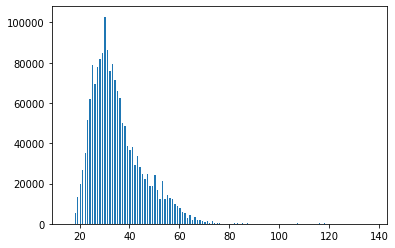

In [28]:
bins = np.arange(15, BikeCopy_age['user_age'].max() + 0.5, 0.5)
plt.hist(data = BikeCopy_age, x = 'user_age', bins = bins);

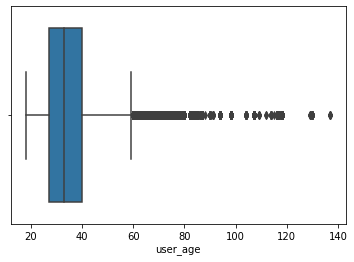

In [29]:
sb.boxplot(data= BikeCopy_age, x='user_age');

In [30]:
BikeCopy_age.user_age.describe()

count   1753003.000000
mean         34.912038
std          10.442886
min          18.000000
25%          27.000000
50%          33.000000
75%          40.000000
max         137.000000
Name: user_age, dtype: float64

## `Note`:
- The oldest user is recorded as being 137, which is pretty unusual and funny in my opinion, that indicates that the age column contain outlaiers that needs to be dealt with. 
- From the boxplot above, I decided to set the maximum age value as 60. I think thats reasonable as people older than that may have some difficulties riding bikes :). 

In [31]:
# dropping BikeCopy_ages more than 60.
BikeCopy_age = BikeCopy_age.drop(BikeCopy_age[BikeCopy_age.user_age > 60].index)

In [32]:
BikeCopy_age.user_age.describe()

count   1424294.000000
mean         34.197961
std           9.258370
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          60.000000
Name: user_age, dtype: float64

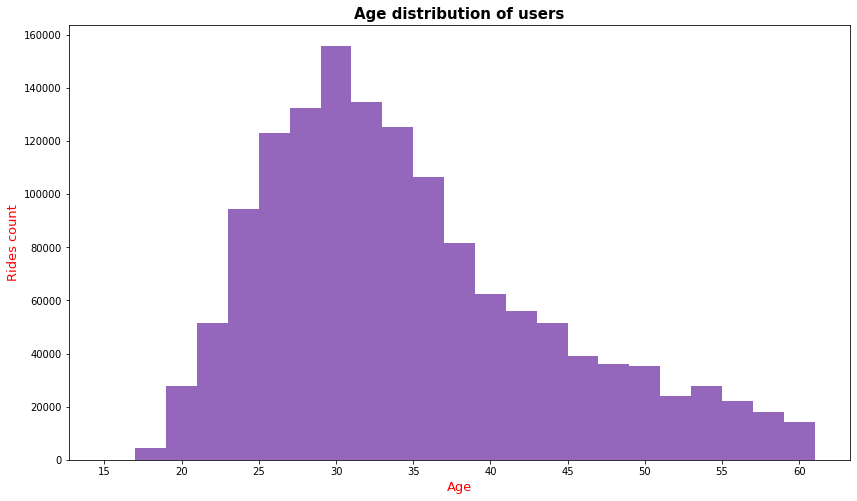

In [33]:
# setting bins, ticks, and lables for the x axis (age).
bins = np.arange(15, BikeCopy_age.user_age.max()+ 2, 2)
ticks = range(15, BikeCopy_age.user_age.max()+ 1, 5)
labels = ['{}'.format(v) for v in ticks]
# setting figure size and plotting ride count for each user age.
plt.figure(figsize=[14,8])
plt.hist(data = BikeCopy_age , x ='user_age', bins = bins, color = sb.color_palette()[4])
plt.xticks(ticks, labels)
plt.xlabel('Age', fontsize = 13, color = 'red')
plt.ylabel('Rides count', fontsize = 13, color = 'red')
plt.title('Age distribution of users', fontsize = 15, fontweight = 'semibold');

## findings:
- The service is restricted to those 18 years or older.
- The majority of users range from mid-twenties to mid-thirties, with a median of 32 and mean of 34.2.

# Total rides per trip duration.

In [34]:
# creating a new column in which trip duration is converted to minutes
BikeCopy['duration_min'] = BikeCopy['duration_sec'] / 60

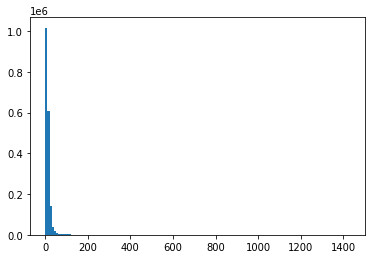

In [35]:
# setting bins and plotting a hist of duration in minutes.
bins = np.arange(0, BikeCopy['duration_min'].max() + 0.5, 10)
plt.hist(data = BikeCopy, x = 'duration_min', bins=bins);

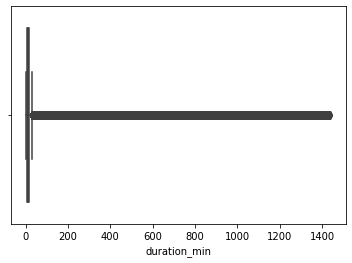

In [36]:
sb.boxplot(data= BikeCopy, x='duration_min');

In [37]:
BikeCopy.duration_min.describe()

count   1863721.000000
mean         14.288376
std          39.506314
min           1.016667
25%           5.833333
50%           9.266667
75%          14.533333
max        1439.433333
Name: duration_min, dtype: float64

## `Note`:
- The bike share system offers a short-term mode of transport, 30-minute and 45-minute time limits are imposed on the customers and subscribers,respectively, with a $3 fee for every additional 15 minutes. so the presence of trip duration of about 1439 minutes seems pretty odd.
- To avoid these outliers, I asumed that most rentals are below the prescribed limit.

In [38]:
# dropping rows with more than 45 min trip duration.
BikeCopy = BikeCopy.drop(BikeCopy[BikeCopy.duration_min > 45].index)

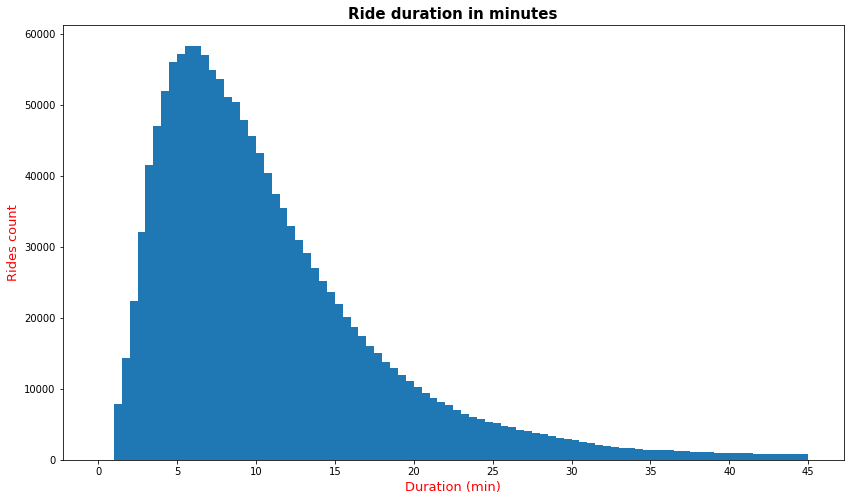

In [39]:
# setting bins, ticks, and lables for the x axis (Duration - min).
bins = np.arange(0, BikeCopy.duration_min.max()+ 0.5, 0.5)
ticks = range(0, int(BikeCopy.duration_min.max())+ 5, 5)
labels = ['{}'.format(v) for v in ticks]
# setting figure size and plotting ride count for each trip duration.
plt.figure(figsize=[14,8])
plt.hist(data = BikeCopy, x ='duration_min', bins = bins)
plt.xticks(ticks, labels)
plt.xlabel('Duration (min)', fontsize = 13, color = 'red')
plt.ylabel('Rides count', fontsize = 13, color = 'red')
plt.title('Ride duration in minutes', fontsize = 15, fontweight='semibold');

## findings:
- The majority of trips are 20 minutes or shorter, meaning that the bikes are mostly used for short distance trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - I first checked the users charachtaristics such as gender and type, Males seems to outnumber the females (nearly 3X) and also the number of the subscribers is much more higher than regular customers.
> - Moving to the `Bike Share for All program`, which is a program for low_income individuals, has not shown that much of subscribers with only 9% enrolled.
> - The most common start station is `San Francisco Ferry Building (Harry Bridges Plaza)` with about 39000 trips, and for the end station, `San Francisco Caltrain Station 2  (Townsend St at 4th St)` comes first with about 49000 trips, and for the most common start-end trips, `San Francisco Ferry Building (Harry Bridges Plaza) - The Embarcadero at Sansome St`, is the top with about 5600 trips.
> - `8 AM` and `5 PM` are the most common ride hours.
> - The number of trips increased as the months advanced, spiked from `April` to `May` and dipped in `August`, then incrased again in `October`. It seems like the bike rides count change over the seasons(high at spring and summer and lower in the winter).
> - Rides count is the lowest during weekends(sat & Sun) unlike weekdays.
> - Trip count seems to be higher at the first half of the month than the second half, with day 31 being having the least number of trips.
> - In order to plot users ages, I had to drop the null rows and assign the new df to other var. Then after looking at the age column statistics, the oldest user is recorded as being 137, which is pretty unusual and funny in my opinion. I decided to set the maximum age value as 60 before plotting, and it seems that the majority of riders are between mid-twenties to mid-thirties.
> - I decided to make a new column for duration but in minutes pefore plotting this var. And after looking at the column statistics I found out that it does also have a very high maximum number of 1439.4 min, although the bike share system offers a short-term mode of transport, 30-minute and 45-minute time limits. So to avoid these outliers, I asumed that most rentals are below the prescribed limit. After plotting, it appeared that the majority of trips are 20 minutes or shorter.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> - At first while cleaning the data before invistigating, I had to change some columns dtypes, and also added new `age`, `hour`, `month`, `day_of_week/month` columns to aid my analysis of the desired variables.
> - Yes, there was unusal distributions in the age and duration columns, such as where the oldest user is recorded as being 137 in the age column, and the longest trip duration to be about 1439.4 minutes long! So to keep the data as clean, simple and  representative as possiple, I had to remove ages older than 60 and trip durations more than the 45-minute time limit.

<a id='be'></a>
## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables that are present:
- User type per hour.
- User type per weekday.
- User gender per week.
- User type per month.
- User gender per hour.
- Top 10 stations trip duration.
- Average trip duartion in minutes for each age group.
- Average trip duration in minutes for both user types.
- Top 10 start stations for each user type.

# User type per hour.

In [40]:
# creating new dataframe by grouping hour and user type.
userType_hr = BikeCopy.groupby(['hour', 'user_type']).size().reset_index()

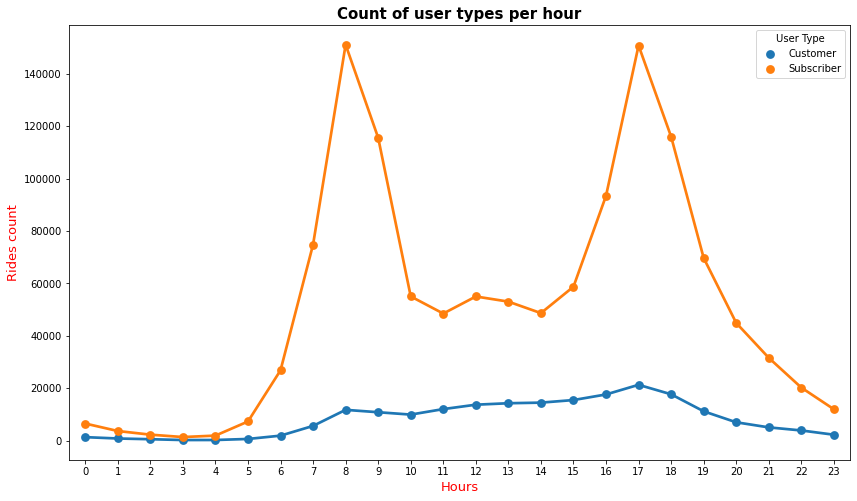

In [41]:
# setting figure size and plotting ride count for both user types each hour.
plt.figure(figsize=[14,8])
ticks = range(0,24)
labels = ['{}'.format(v) for v in ticks]
sb.pointplot(data = userType_hr, x='hour', y=0, hue='user_type')
plt.xticks(ticks, labels)
plt.xlabel('Hours', fontsize = 13, color = 'red')
plt.ylabel('Rides count', fontsize = 13, color = 'red')
plt.title('Count of user types per hour', fontsize = 15, fontweight='semibold');
L = plt.legend()
L.set_title('User Type',prop={'size':10});

## findings:
- Looks like subscribers are the dominant group here as seen before, the pattern between subscribers and customers is nearly the same, both increase around 8 AM and 5 PM (the rush hours).
- `Customers` ride count increase slightly and continuously starting from 10AM till reaching 5 PM before starting to decline.
- `Subscribers` ride count declined steeply between 10AM and 2 PM, and started to increase afterwards till it peaked again at 5 PM, then to another decline till midnight.

# User type per week.

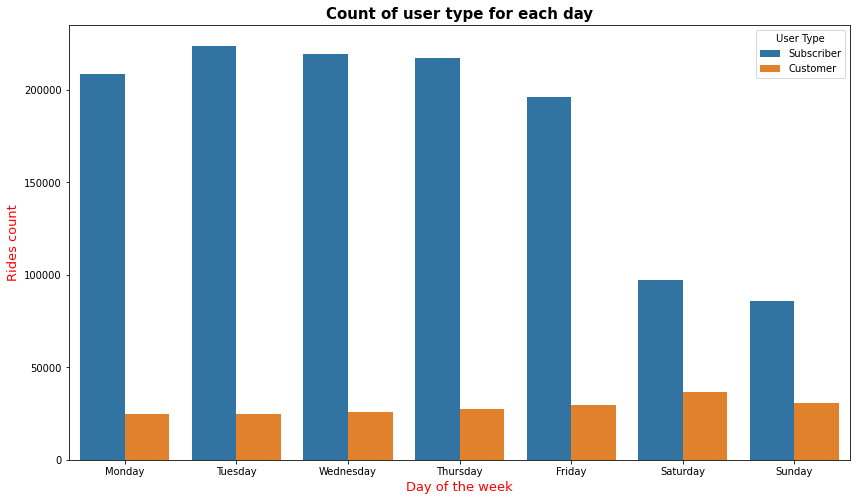

In [42]:
# setting figure size and plotting ride count for both user types each hour.
plt.figure(figsize=[14,8])
sb.countplot(data = BikeCopy, x = 'day_of_week', hue = 'user_type')
plt.xlabel('Day of the week', fontsize = 13, color = 'red')
plt.ylabel('Rides count', fontsize = 13, color = 'red')
plt.title('Count of user type for each day', fontsize = 15, fontweight='semibold');
L = plt.legend()
L.set_title('User Type',prop={'size':10});

## findings:
- As shown in the graph above, it looks like there's a diffirence between subscribers and customers when it comes to using the service during weekdays and weekends. Subscribers tend to be more active in weekdays rather than weekends. In the contrary, customers tend use the service during weekends more, which may indicate that the subscribers use the survice mainly for commuting while customers use it for more personal matters during weekends.

# User gender per week.

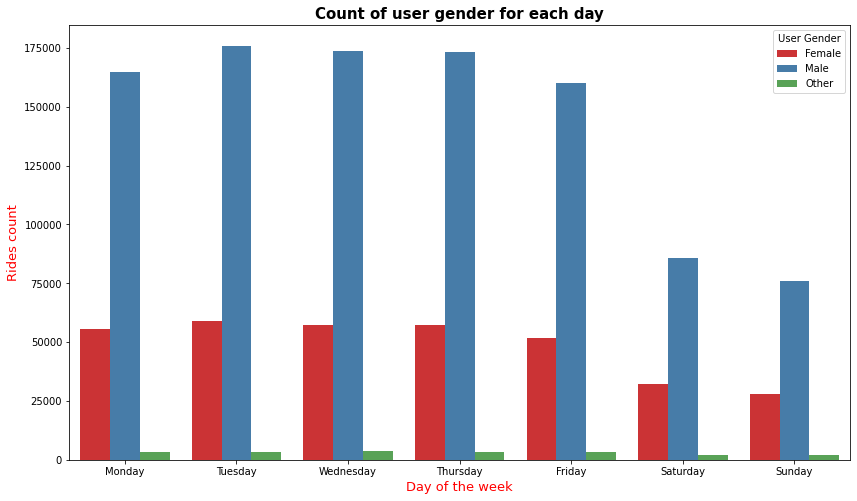

In [43]:
# setting figure size and plotting ride count for both user types each hour.
plt.figure(figsize=[14,8])
sb.countplot(data = BikeCopy, x = 'day_of_week', hue = 'member_gender', palette = 'Set1')
plt.xlabel('Day of the week', fontsize = 13, color = 'red')
plt.ylabel('Rides count', fontsize = 13, color = 'red')
plt.title('Count of user gender for each day', fontsize = 15, fontweight='semibold');
L = plt.legend()
L.set_title('User Gender',prop={'size':10});

## findings:
- Both males and females take more rides in weekdays rather than weekends.

# User type per month.

In [44]:
# creating new dataframe by grouping hour and user type.
user_per_month = BikeCopy.groupby(['month', 'user_type']).size().reset_index(name='count')

In [45]:
# adjusting the shape of the dataframe.
user_per_month = user_per_month.pivot(index = 'month', columns = 'user_type', values = 'count')

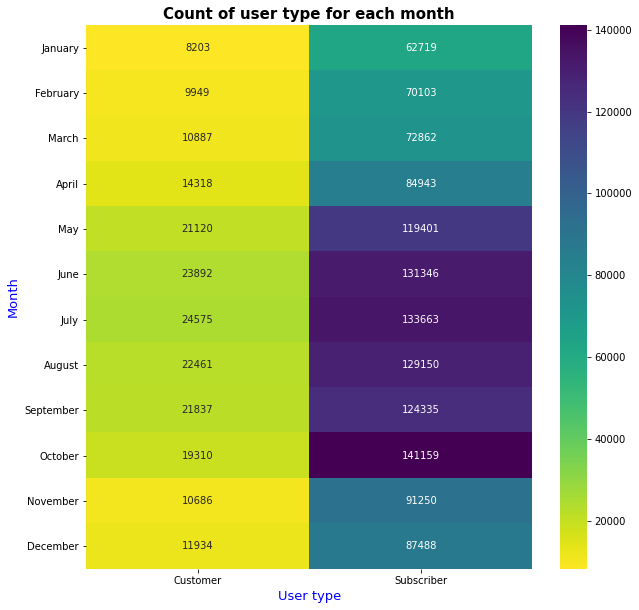

In [46]:
# setting figure size and plotting user type count for each month.
plt.figure(figsize=[10,10])
sb.heatmap(user_per_month, annot = True, fmt = '.0f', cmap ='viridis_r')
plt.xlabel('User type', fontsize = 13, color = 'blue')
plt.ylabel('Month', fontsize = 13, color = 'blue')
plt.title('Count of user type for each month', fontsize = 15, fontweight='semibold');

## findings:
- Both subscribers and customers show increased trip count starting April till reaching October, and decreased trip count from November to March, which means both groups tend to use the service more in the warmer weather (during summer months) more than in cold weather (during winter months).
- Subscriber's most trip count was scored in October (with 141159 total rides), while the customer's one was in July (with 24575 total rides).

# User gender per hour

In [47]:
# creating new dataframe by grouping hour and user type.
userGender_hr = BikeCopy.groupby(['hour', 'member_gender']).size().reset_index()

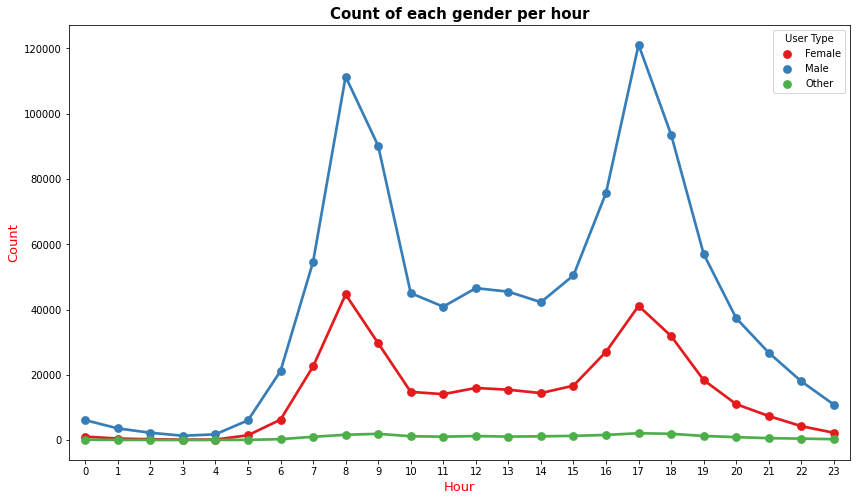

In [48]:
# setting figure size and plotting user gender count for each hour of the day.
plt.figure(figsize=[14,8])
ticks = range(0,24)
labels = ['{}'.format(v) for v in ticks]
sb.pointplot(data = userGender_hr, x='hour', y=0, hue='member_gender', palette= 'Set1')
plt.xticks(ticks, labels)
plt.xlabel('Hour', fontsize = 13, color = 'red')
plt.ylabel('Count', fontsize = 13, color = 'red')
plt.title('Count of each gender per hour', fontsize = 15, fontweight='semibold')
L = plt.legend()
L.set_title('User Type',prop={'size':10});

## findings:
- The pattern between males and females is nearly the same, the only difference is that the males outnumbers the females as shown.

# Top 10 stations average trip duration.

In [49]:
# getting the names of top 10 stations & put them in a list.
stations = BikeCopy.start_station_name.value_counts().nlargest(10).index.tolist()

In [50]:
# create a copy with only the top 10 stations.
top_station = BikeCopy[BikeCopy['start_station_name'].isin(stations)]

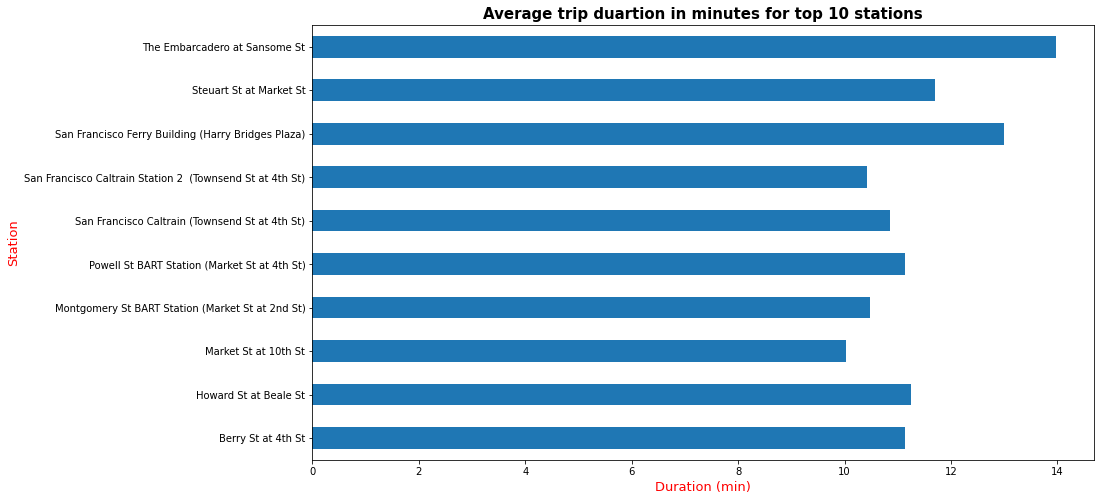

In [51]:
# plotting the mean trip duration in minutes for the top 10 stations.
top_station.groupby('start_station_name')['duration_min'].mean().plot(kind='barh', figsize=[14,8])
plt.xlabel('Duration (min)', fontsize = 13, color = 'red')
plt.ylabel('Station', fontsize = 13, color = 'red')
plt.title('Average trip duartion in minutes for top 10 stations', fontsize = 15, fontweight='semibold');

## findings:
- Seems that the average trip duration for the top 10 stations is between 10 to 14 minutes long.  
- `The Embarcadero` station has the longest trips with a mean of 14 minutes.

# Average trip duartion in minutes for each age group.

In [52]:
# creating new column categorizing users by age.
BikeCopy_age['age_category'] = BikeCopy_age['user_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                              else '21 - 30' if 20<x<=30
                                                              else '31 - 40' if 30<x<=40
                                                              else '41 - 50' if 40<x<=50
                                                              else '51 - 60' if 50<x<=60
                                                              else x)

In [53]:
# adding duration in minutes column to a copy of the df that was used previously & dropping rows with outliers.
BikeCopy_age['duration_min'] = BikeCopy_age['duration_sec'] / 60
BikeCopy_age = BikeCopy_age.drop(BikeCopy_age[BikeCopy_age.duration_min > 45].index)

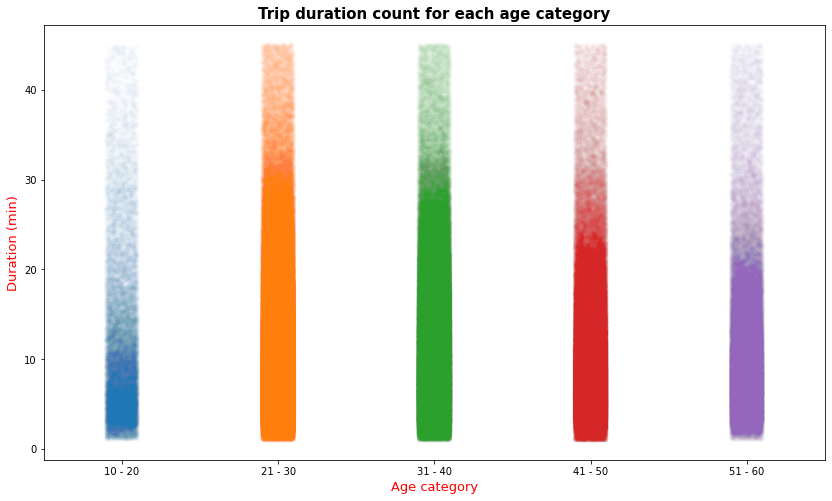

In [54]:
# setting figure size and plotting trip duration for each age group.
plt.figure(figsize=[14,8])
plt.title('Trip duration count for each age category', fontsize = 15, fontweight='semibold')
# stripplot.
ticks = range(15, BikeCopy_age.user_age.max()+ 1, 5)
labels = ['{}'.format(v) for v in ticks]
sb.stripplot(data = BikeCopy_age, x = 'age_category', y = 'duration_min', alpha = 1/100, order = ['10 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60'])
plt.xlabel('Age category', fontsize = 13, color = 'red')
plt.ylabel('Duration (min)', fontsize = 13, color = 'red');

## findings:
- On average, people between 21 and 40 tends to take longer rides than the rest.

# Average trip duration in minutes for both user types.

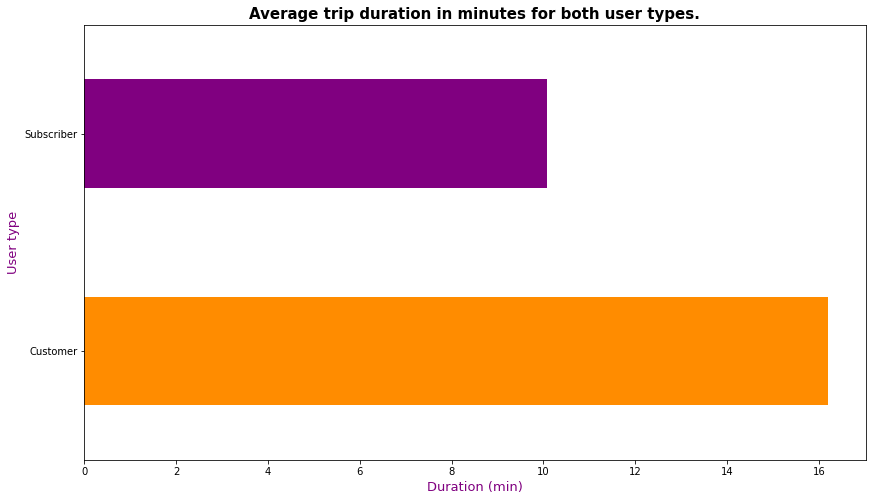

In [55]:
# setting figure size, grouping the data by user type and mean duration in minutes, then plotting the data as a bar chart.
plt.figure(figsize=[14,8])
BikeCopy.groupby('user_type')['duration_min'].mean().plot(kind='barh', color = ['darkorange', 'purple'])
plt.xlabel('Duration (min)', fontsize = 13, color = 'purple')
plt.ylabel('User type', fontsize = 13, color = 'purple')
plt.title('Average trip duration in minutes for both user types.', fontsize = 15, fontweight='semibold');

## findings:
- Customers tend to take an average of 16 minutes per trip, while subscribers take about 10 minutes, which reinforce the idea about the customers using this service more personnaly unlike subscribers which would use it only as a commuting tool.

# Top 10 start stations for each user type.

In [56]:
filter_list = BikeCopy.groupby(['start_station_name']).size().nlargest(10).index.tolist()

In [57]:
user_type_station = BikeCopy.groupby(['start_station_name'])['user_type'].value_counts().reset_index(name='count')

In [58]:
user_type_station = user_type_station[user_type_station['start_station_name'].isin(filter_list)]

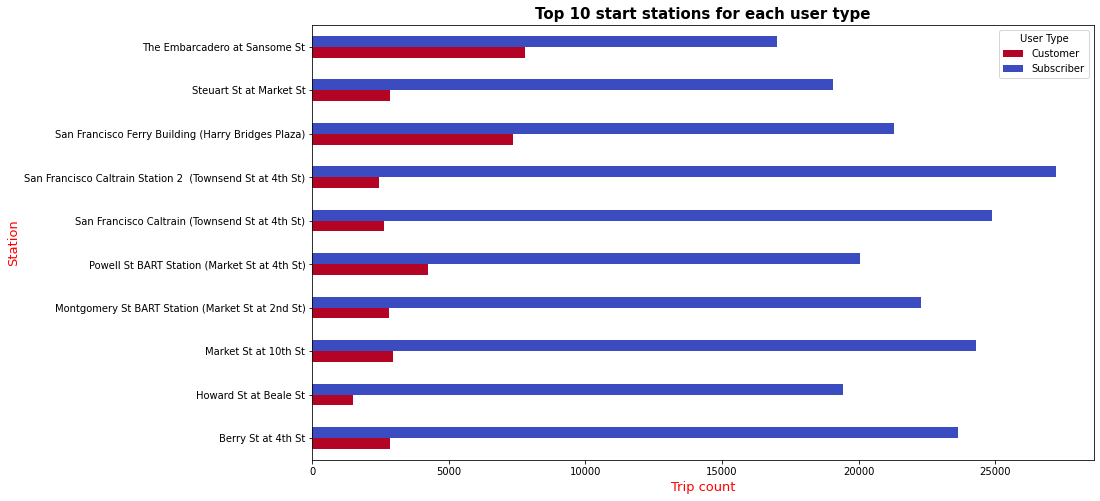

In [59]:
user_type_station.pivot(index = 'start_station_name', columns = 'user_type', values = 'count').plot(kind = 'barh', figsize = [14, 8], cmap = 'coolwarm_r')
plt.xlabel('Trip count', fontsize = 13, color = 'red')
plt.ylabel('Station', fontsize = 13, color = 'red')
plt.title('Top 10 start stations for each user type', fontsize = 15, fontweight='semibold')
L = plt.legend()
L.set_title('User Type',prop={'size':10});

## findings:
- The most popular start station for subscribers is `San Francisco Caltrain Station 2`, while for customers, `The Embarcadero` station is the most popular one.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> #### User type with:
> - `Hour`: 
>     * both subscribers and customers show most rides count around 8 AM and 5 PM, but the pattern is quite diffrient between both types. Custmers ride count start increase slightly and contineuosly from 10 AM till reaching 5 PM, while subscribers rides count peak at 8 AM then sharply decrease and remain somewhat steady between 11 AM 2 PM, then highly increase as the time pass till it reaches it's peak at 5 PM.
> - `Days of the week`: 
>     * Subscribers tend to use the service more during the weekdays than weekends, and in the opposite, customers take more trips during the weekends.
> - `Month`: 
>     * The number of rides for both customers and subscribers increased between April and October, and decreases as it gets colder between November and March.
>
> #### User gender with:
> - `Hour`:
>     * Both males and females show the same riding pattern throughout the hours, with only the number of the males being higher than the females.
> - `Days of the week`:
>     * Both males and females also take more rides during weekdays than weekends.
>
> #### User age with:
> - `Trip duration`:
>     * people between 20 and 40 tend to take longer rides than younger or older people. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - Customers tend to take longer rides than subscribers with an average of 16 minutes, while subscribers take an average of 10 minutes trips.
> - Subscribers showed the hieghst number of rides during October, while customers showed the hieghst number of rides during July.
> - The average trip duration for the top 10 stations is between 10 - 14 minutes, and `The Embarcadero` station has the highest average trip duration with 14 minutes.
> - The most popular start station for subscribers is `San Francisco Caltrain Station 2`, while for customers, `The Embarcadero` station is the most popular one.

<a id='me'></a>
## Multivariate Exploration


# Trip count for every user gender & type for every day of the week.

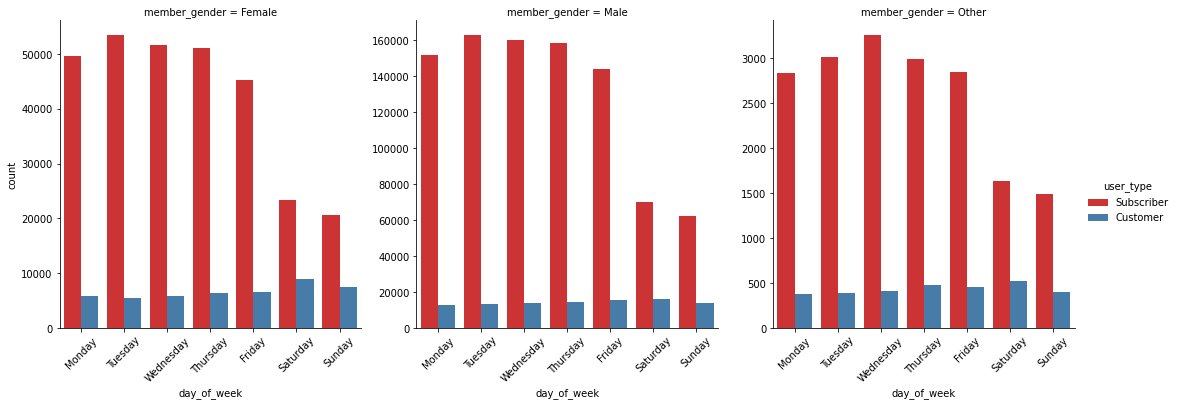

In [60]:
a = sb.catplot(col="member_gender", x = 'day_of_week', hue="user_type", data = BikeCopy, kind = 'count', sharey = False, palette= 'Set1')
a.set_xticklabels(rotation=45);

## findings:
- Both subscribers and customers in each gender show the same riding pattern, with the number of trips being more during weekdays than weekends for the subscribers, and the opposite for the customers.

# Trip duration for each user type every month.

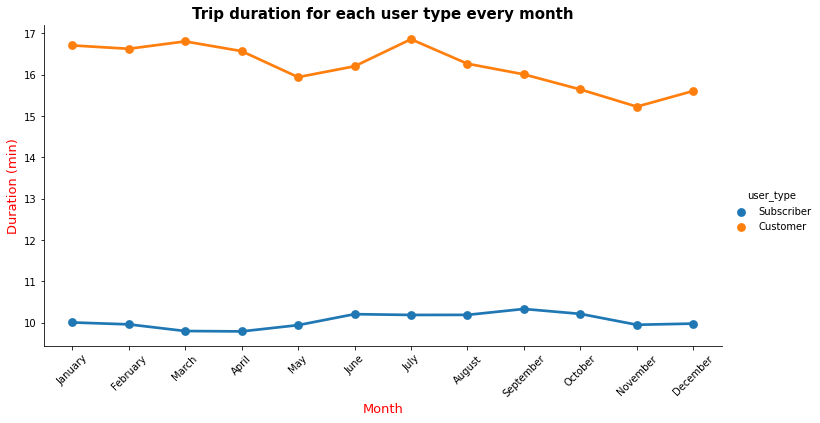

In [61]:
g = sb.catplot(x ='month', y = 'duration_min', hue = 'user_type', data = BikeCopy, kind = 'point', ci = None, height = 5, aspect = 2)
plt.title('Trip duration for each user type every month', fontsize = 15, fontweight='semibold')
plt.xlabel('Month', fontsize = 13, color = 'red')
plt.ylabel('Duration (min)', fontsize = 13, color = 'red')
g.set_xticklabels(rotation=45);

## findings:
- Customers seem to ride longer than subscribers in the whole year, the longest average duration was scored in July with about 17 minutes. While for subscribers, the longest average duration was scored in September with about 10 and half minutes.

# Trip duration for each user gender every day of the week.

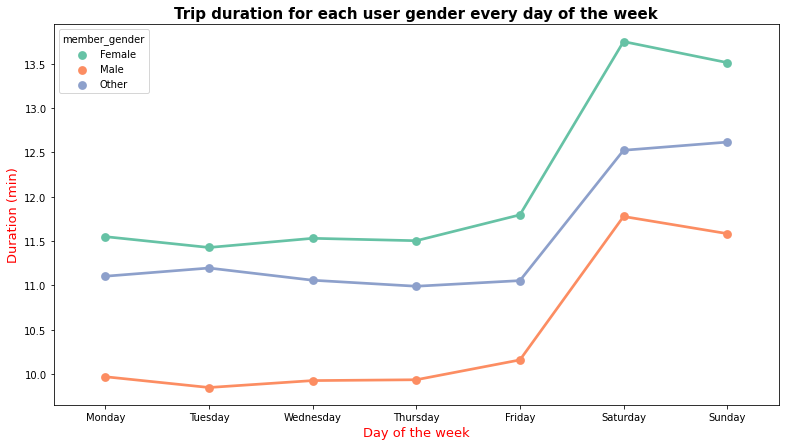

In [62]:
plt.figure(figsize=[13,7])
sb.pointplot(data = BikeCopy, x = 'day_of_week', y = 'duration_min', hue = 'member_gender', palette = 'Set2', ci = None)
plt.title('Trip duration for each user gender every day of the week', fontsize = 15, fontweight='semibold')
plt.xlabel('Day of the week', fontsize = 13, color = 'red')
plt.ylabel('Duration (min)', fontsize = 13, color = 'red');

## findings:
- Females seem to ride longer than males throughout the whole week. Both genders ride longer during weekends rather than weekdays.

# Trip duration for each user type every day of the week

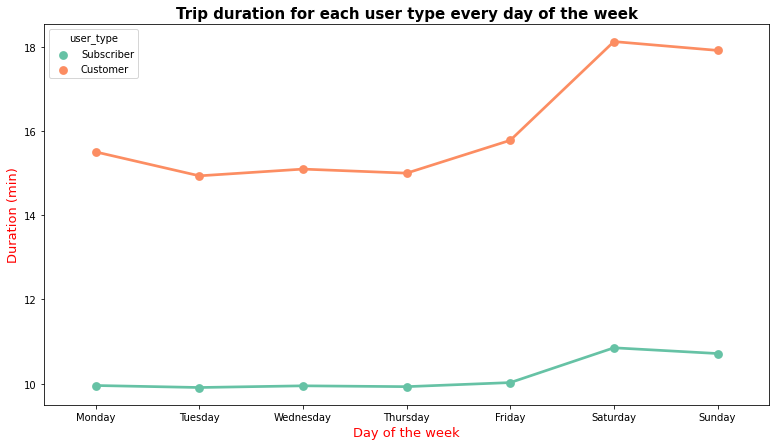

In [63]:
plt.figure(figsize=[13,7])
sb.pointplot(data = BikeCopy, x = 'day_of_week', y = 'duration_min', hue = 'user_type', palette = 'Set2', ci = None)
plt.title('Trip duration for each user type every day of the week', fontsize = 15, fontweight='semibold')
plt.xlabel('Day of the week', fontsize = 13, color = 'red')
plt.ylabel('Duration (min)', fontsize = 13, color = 'red');

## findings:
- Both subscribers and customers have longer trips during weekends rather han weekdays on average.

# Trip count for each user type in every day and month.

In [64]:
mdt = BikeCopy.groupby(['month', 'day_of_week', 'user_type']).size().reset_index(name='count')

In [65]:
mdt = mdt.pivot(index = 'month', columns = ['day_of_week','user_type'], values = 'count')

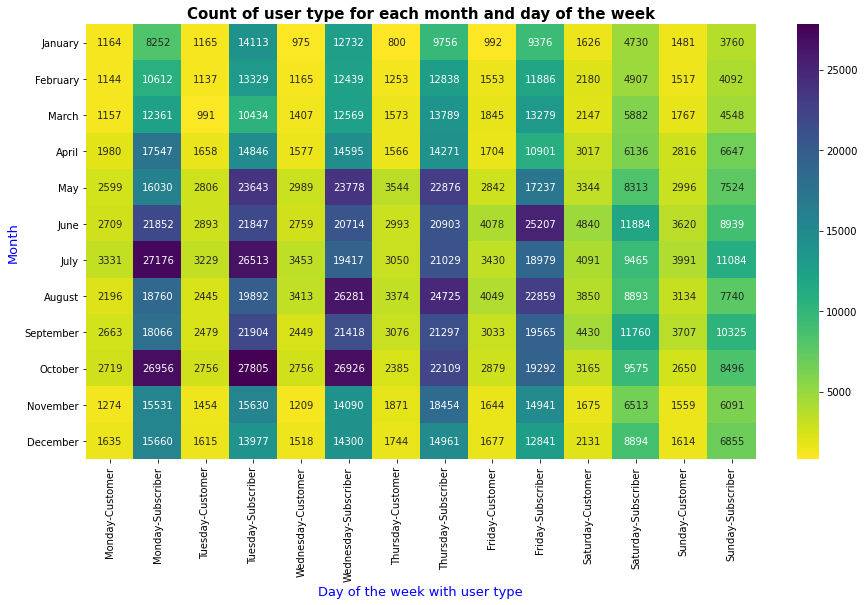

In [66]:
plt.figure(figsize=[15,8])
sb.heatmap(mdt, annot = True, fmt = '.0f', cmap ='viridis_r')
plt.xlabel('Day of the week with user type', fontsize = 13, color = 'blue')
plt.ylabel('Month', fontsize = 13, color = 'blue')
plt.title('Count of user type for each month and day of the week', fontsize = 15, fontweight='semibold');

## findings:
- October shows the highest ride count for subscribers, specially on the first 3 days of the week, and it seems that tuesday is the busiest day throghout the year. While for customers, July shows the most ride count, specially on weekends.

# Trip count for each user type in every day and hour.

In [67]:
hdt = BikeCopy.groupby(['hour', 'day_of_week', 'user_type']).size().reset_index(name='count')

In [68]:
hdt = hdt.pivot(index = 'hour', columns = ['day_of_week','user_type'], values = 'count')

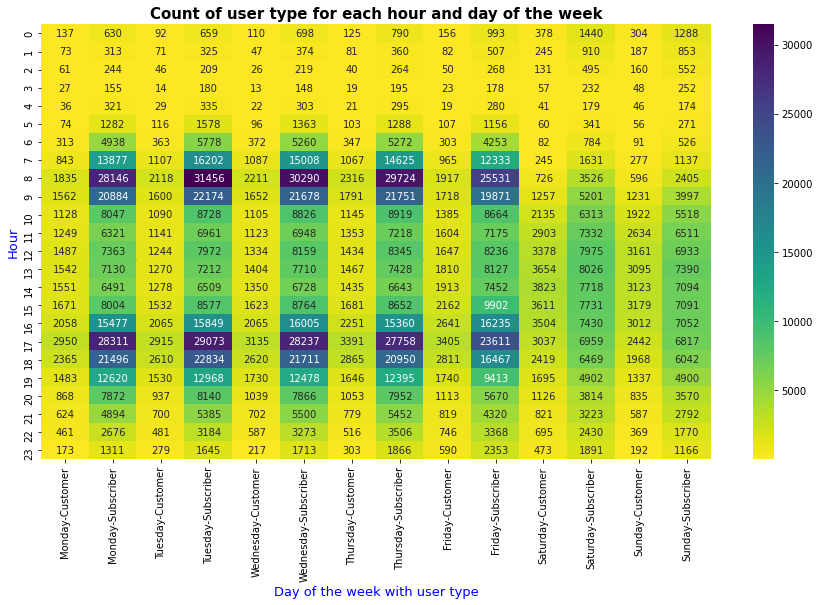

In [69]:
plt.figure(figsize=[15,8])
sb.heatmap(hdt, annot = True, fmt = '.0f', cmap ='viridis_r')
plt.xlabel('Day of the week with user type', fontsize = 13, color = 'blue')
plt.ylabel('Hour', fontsize = 13, color = 'blue')
plt.title('Count of user type for each hour and day of the week', fontsize = 15, fontweight='semibold');

## findings:
- during weekdays, subscribers and customers ride count peak at both 8 AM and 5 PM, with the number of  rides decline in between. While in weekends, the pattern is reversed. The number of trips increase gradually starting from 8 AM  till reaching the highest ride count at 1 PM for subscribers and 2-3 PM for customers, then the ride count decline till reching the end of the day. 

# Count of each user gender and type in every age category.

In [70]:
amu = BikeCopy_age.groupby(['age_category', 'member_gender', 'user_type']).size().reset_index(name='count')

In [71]:
amu = amu.pivot(index = 'age_category', columns = ['member_gender','user_type'], values = 'count')

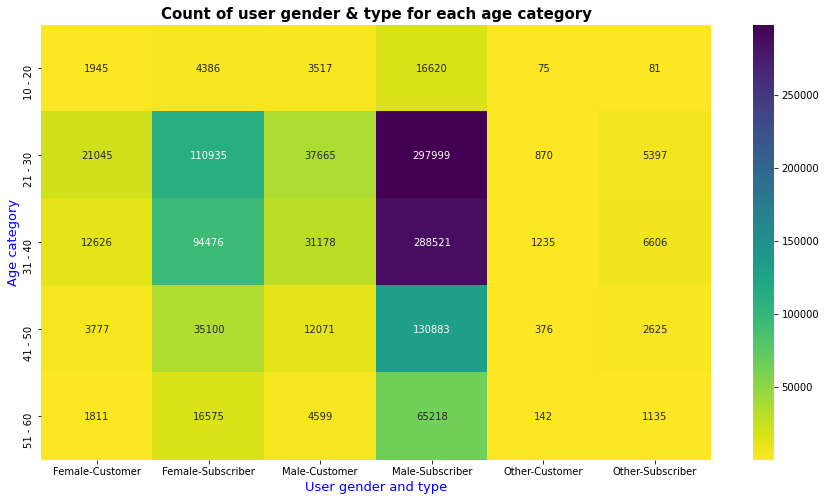

In [72]:
plt.figure(figsize=[15,8])
sb.heatmap(amu, annot = True, fmt = '.0f', cmap ='viridis_r')
plt.xlabel('User gender and type', fontsize = 13, color = 'blue')
plt.ylabel('Age category', fontsize = 13, color = 'blue')
plt.title('Count of user gender & type for each age category', fontsize = 15, fontweight='semibold');

## findings:
- Seems that most subscribers and customers are males that are between 21-30 years old. 
- In both genders and user types, most people are between 21-40 years old.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - There's no difference between genders when it comes to each user type riding routine.
> - Customers really tend to take longer rides on average. 
> - After displaying trip duration for each gender throughout the days, Females seem to take longer trips on average than males.
> - Weither it is a subscriber or customer, male or female, the duration of the trip is longer during weekends rather than in weekdays.
> - October is really the month in which subscribers rode bikes the most, while customers rode bikes the most in July.
> - Tuesday seems to be the busiest day for subscribers during commute hours.
> - The bike riding hours during weekdays is different than that of weekends.
> - Most subscribers and customers are people between 21-40 years old.

### Were there any interesting or surprising interactions between features?

> - It was surprising to see that on average, customers take longer rides than the actual subscribers, also females taking longer rides compared to males.

In [73]:
# saving the cleaned dataframe.
# BikeCopy.to_csv('clean_Bikeshare_df.csv', index=False)